In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score


C:\Users\user\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Read the dataset
dataset = pd.read_csv('weatherAus.csv')


In [4]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
# Extract features (X) and target variable (Y)
X = dataset.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]].values
Y = dataset.iloc[:, -1].values


In [6]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [7]:
print(Y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [8]:
Y= Y.reshape(-1,1)

In [9]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


In [46]:
data_types = pd.DataFrame(dataset.dtypes, columns=['Data Types'])
count_of_nulls = pd.DataFrame(dataset.isnull().sum(), columns=['Count of Nulls'])
data_dictionary = pd.concat([data_types, count_of_nulls], axis='columns')
data_dictionary

,Data Types,Count of Nulls
Date,object,0
Location,object,0
MinTemp,float64,1485
MaxTemp,float64,1261
Rainfall,float64,3261
Evaporation,float64,62790
Sunshine,float64,69835
WindGustDir,object,10326
WindGustSpeed,float64,10263
WindDir9am,object,10566


In [10]:
# Impute missing values in features using the most frequent strategy
imputer_X = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer_X.fit_transform(X)


In [11]:
# Impute missing values for the target variable (Y) using the most frequent strategy
imputer_Y = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Y = imputer_Y.fit_transform(Y)


In [12]:
# Use OneHotEncoder for categorical variables
categorical_columns = [0, 6, 8, 9, -1]
onehot_encoder = OneHotEncoder(categories='auto', drop='first', sparse=False)
X_categorical = onehot_encoder.fit_transform(X[:, categorical_columns])


In [13]:
# Remove the original categorical columns from X
X = np.delete(X, categorical_columns, axis=1)

In [14]:
# Concatenate the one-hot encoded columns with the remaining columns in X
X = np.hstack((X, X_categorical))

In [15]:
# Standardize the features using StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [16]:
print(X)

[[ 0.19132753 -0.04135977 -0.20358073 ...  3.92322649 -0.26460377
  -0.52979545]
 [-0.75105231  0.26874452 -0.27509664 ... -0.25489224  3.77923569
  -0.52979545]
 [ 0.11279588  0.35331842 -0.27509664 ... -0.25489224  3.77923569
  -0.52979545]
 ...
 [-1.06517892  0.52246622 -0.27509664 ...  3.92322649 -0.26460377
  -0.52979545]
 [-0.68822699  0.53656187 -0.27509664 ... -0.25489224 -0.26460377
  -0.52979545]
 [ 0.42692249 -0.45013361 -0.27509664 ... -0.25489224 -0.26460377
  -0.52979545]]


In [17]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [19]:
import matplotlib.pyplot as plt

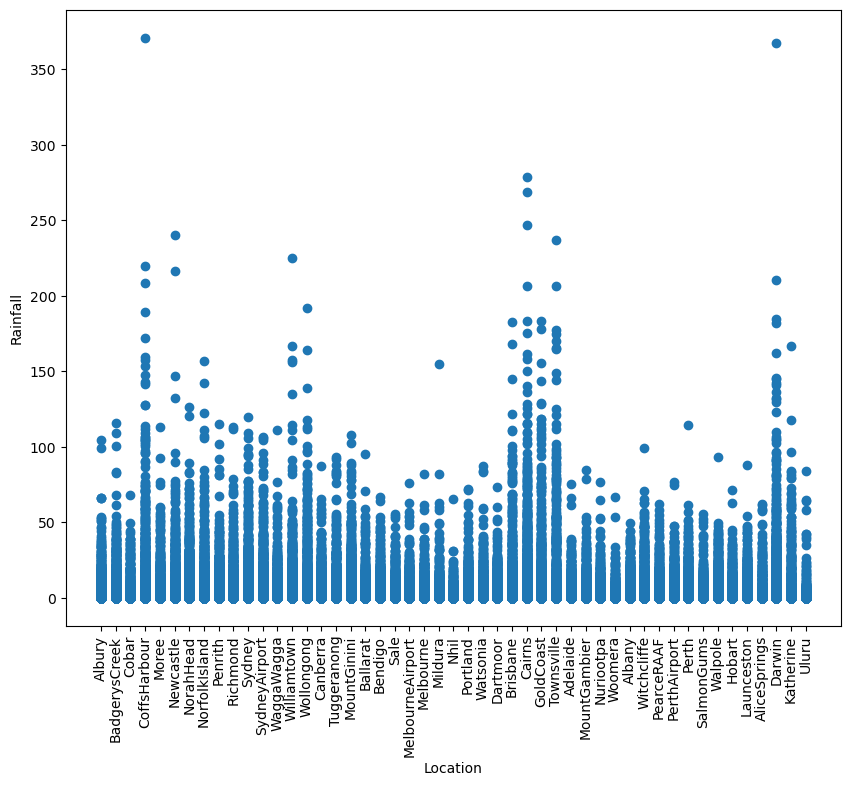

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(dataset['Location'],dataset['Rainfall'])
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.ylabel("Rainfall")
plt.show()

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [22]:
X_train.shape

(109095, 110)

In [23]:
Y_train.shape

(109095, 1)

In [24]:
# Train a HistGradientBoostingClassifier
classifier = HistGradientBoostingClassifier(
    max_iter=400,
    max_depth=25,
    min_samples_leaf=10,
    max_leaf_nodes=50,
    l2_regularization=0.1,
    random_state=0
)

In [25]:
classifier.fit(X_train, Y_train.ravel())

HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=25,
                               max_iter=400, max_leaf_nodes=50,
                               min_samples_leaf=10, random_state=0)

In [26]:
# Evaluate the model
y_pred = classifier.predict(X_test)
accuracy_score(Y_test, y_pred)


0.860827718960539

In [27]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train, Y_train)

Learning rate set to 0.040461
0:	total: 173ms	remaining: 5m 46s
1:	total: 207ms	remaining: 3m 26s
2:	total: 228ms	remaining: 2m 31s
3:	total: 248ms	remaining: 2m 3s
4:	total: 267ms	remaining: 1m 46s
5:	total: 285ms	remaining: 1m 34s
6:	total: 302ms	remaining: 1m 25s
7:	total: 319ms	remaining: 1m 19s
8:	total: 335ms	remaining: 1m 14s
9:	total: 352ms	remaining: 1m 10s
10:	total: 369ms	remaining: 1m 6s
11:	total: 387ms	remaining: 1m 4s
12:	total: 403ms	remaining: 1m 1s
13:	total: 420ms	remaining: 59.6s
14:	total: 437ms	remaining: 57.8s
15:	total: 453ms	remaining: 56.2s
16:	total: 470ms	remaining: 54.9s
17:	total: 487ms	remaining: 53.6s
18:	total: 505ms	remaining: 52.6s
19:	total: 523ms	remaining: 51.8s
20:	total: 541ms	remaining: 50.9s
21:	total: 557ms	remaining: 50.1s
22:	total: 572ms	remaining: 49.2s
23:	total: 589ms	remaining: 48.5s
24:	total: 606ms	remaining: 47.9s
25:	total: 622ms	remaining: 47.2s
26:	total: 638ms	remaining: 46.6s
27:	total: 654ms	remaining: 46.1s
28:	total: 671ms	re

240:	total: 4.63s	remaining: 33.8s
241:	total: 4.64s	remaining: 33.7s
242:	total: 4.66s	remaining: 33.7s
243:	total: 4.68s	remaining: 33.7s
244:	total: 4.7s	remaining: 33.6s
245:	total: 4.71s	remaining: 33.6s
246:	total: 4.73s	remaining: 33.6s
247:	total: 4.75s	remaining: 33.6s
248:	total: 4.77s	remaining: 33.5s
249:	total: 4.79s	remaining: 33.5s
250:	total: 4.8s	remaining: 33.5s
251:	total: 4.82s	remaining: 33.5s
252:	total: 4.85s	remaining: 33.5s
253:	total: 4.87s	remaining: 33.5s
254:	total: 4.88s	remaining: 33.4s
255:	total: 4.9s	remaining: 33.4s
256:	total: 4.93s	remaining: 33.4s
257:	total: 4.96s	remaining: 33.5s
258:	total: 4.98s	remaining: 33.5s
259:	total: 5s	remaining: 33.4s
260:	total: 5.02s	remaining: 33.5s
261:	total: 5.05s	remaining: 33.5s
262:	total: 5.07s	remaining: 33.5s
263:	total: 5.09s	remaining: 33.5s
264:	total: 5.11s	remaining: 33.5s
265:	total: 5.13s	remaining: 33.5s
266:	total: 5.16s	remaining: 33.5s
267:	total: 5.18s	remaining: 33.5s
268:	total: 5.21s	remainin

481:	total: 9.57s	remaining: 30.1s
482:	total: 9.6s	remaining: 30.2s
483:	total: 9.63s	remaining: 30.2s
484:	total: 9.65s	remaining: 30.2s
485:	total: 9.68s	remaining: 30.2s
486:	total: 9.71s	remaining: 30.2s
487:	total: 9.74s	remaining: 30.2s
488:	total: 9.76s	remaining: 30.2s
489:	total: 9.79s	remaining: 30.2s
490:	total: 9.82s	remaining: 30.2s
491:	total: 9.85s	remaining: 30.2s
492:	total: 9.88s	remaining: 30.2s
493:	total: 9.91s	remaining: 30.2s
494:	total: 9.95s	remaining: 30.2s
495:	total: 9.97s	remaining: 30.2s
496:	total: 10s	remaining: 30.3s
497:	total: 10s	remaining: 30.3s
498:	total: 10.1s	remaining: 30.3s
499:	total: 10.1s	remaining: 30.3s
500:	total: 10.1s	remaining: 30.3s
501:	total: 10.2s	remaining: 30.3s
502:	total: 10.2s	remaining: 30.4s
503:	total: 10.2s	remaining: 30.4s
504:	total: 10.3s	remaining: 30.4s
505:	total: 10.3s	remaining: 30.5s
506:	total: 10.3s	remaining: 30.5s
507:	total: 10.4s	remaining: 30.5s
508:	total: 10.4s	remaining: 30.5s
509:	total: 10.4s	remaini

718:	total: 16.2s	remaining: 28.8s
719:	total: 16.2s	remaining: 28.8s
720:	total: 16.2s	remaining: 28.8s
721:	total: 16.2s	remaining: 28.8s
722:	total: 16.3s	remaining: 28.7s
723:	total: 16.3s	remaining: 28.7s
724:	total: 16.3s	remaining: 28.7s
725:	total: 16.3s	remaining: 28.7s
726:	total: 16.4s	remaining: 28.7s
727:	total: 16.4s	remaining: 28.7s
728:	total: 16.4s	remaining: 28.7s
729:	total: 16.5s	remaining: 28.7s
730:	total: 16.5s	remaining: 28.6s
731:	total: 16.5s	remaining: 28.6s
732:	total: 16.5s	remaining: 28.6s
733:	total: 16.6s	remaining: 28.6s
734:	total: 16.6s	remaining: 28.6s
735:	total: 16.6s	remaining: 28.5s
736:	total: 16.6s	remaining: 28.5s
737:	total: 16.7s	remaining: 28.5s
738:	total: 16.7s	remaining: 28.5s
739:	total: 16.7s	remaining: 28.5s
740:	total: 16.8s	remaining: 28.5s
741:	total: 16.8s	remaining: 28.5s
742:	total: 16.8s	remaining: 28.4s
743:	total: 16.8s	remaining: 28.4s
744:	total: 16.9s	remaining: 28.4s
745:	total: 16.9s	remaining: 28.4s
746:	total: 16.9s	re

955:	total: 21.8s	remaining: 23.8s
956:	total: 21.9s	remaining: 23.8s
957:	total: 21.9s	remaining: 23.8s
958:	total: 21.9s	remaining: 23.8s
959:	total: 21.9s	remaining: 23.8s
960:	total: 22s	remaining: 23.7s
961:	total: 22s	remaining: 23.7s
962:	total: 22s	remaining: 23.7s
963:	total: 22.1s	remaining: 23.7s
964:	total: 22.1s	remaining: 23.7s
965:	total: 22.1s	remaining: 23.7s
966:	total: 22.1s	remaining: 23.6s
967:	total: 22.2s	remaining: 23.6s
968:	total: 22.2s	remaining: 23.6s
969:	total: 22.2s	remaining: 23.6s
970:	total: 22.2s	remaining: 23.6s
971:	total: 22.2s	remaining: 23.5s
972:	total: 22.3s	remaining: 23.5s
973:	total: 22.3s	remaining: 23.5s
974:	total: 22.3s	remaining: 23.5s
975:	total: 22.3s	remaining: 23.4s
976:	total: 22.4s	remaining: 23.4s
977:	total: 22.4s	remaining: 23.4s
978:	total: 22.4s	remaining: 23.4s
979:	total: 22.4s	remaining: 23.4s
980:	total: 22.5s	remaining: 23.3s
981:	total: 22.5s	remaining: 23.3s
982:	total: 22.5s	remaining: 23.3s
983:	total: 22.6s	remainin

1189:	total: 28.6s	remaining: 19.5s
1190:	total: 28.6s	remaining: 19.5s
1191:	total: 28.7s	remaining: 19.4s
1192:	total: 28.7s	remaining: 19.4s
1193:	total: 28.7s	remaining: 19.4s
1194:	total: 28.8s	remaining: 19.4s
1195:	total: 28.8s	remaining: 19.4s
1196:	total: 28.8s	remaining: 19.3s
1197:	total: 28.9s	remaining: 19.3s
1198:	total: 28.9s	remaining: 19.3s
1199:	total: 28.9s	remaining: 19.3s
1200:	total: 29s	remaining: 19.3s
1201:	total: 29s	remaining: 19.2s
1202:	total: 29s	remaining: 19.2s
1203:	total: 29s	remaining: 19.2s
1204:	total: 29.1s	remaining: 19.2s
1205:	total: 29.1s	remaining: 19.2s
1206:	total: 29.1s	remaining: 19.1s
1207:	total: 29.1s	remaining: 19.1s
1208:	total: 29.2s	remaining: 19.1s
1209:	total: 29.2s	remaining: 19.1s
1210:	total: 29.2s	remaining: 19s
1211:	total: 29.2s	remaining: 19s
1212:	total: 29.2s	remaining: 19s
1213:	total: 29.3s	remaining: 18.9s
1214:	total: 29.3s	remaining: 18.9s
1215:	total: 29.3s	remaining: 18.9s
1216:	total: 29.3s	remaining: 18.9s
1217:	

1425:	total: 34.7s	remaining: 13.9s
1426:	total: 34.7s	remaining: 13.9s
1427:	total: 34.7s	remaining: 13.9s
1428:	total: 34.7s	remaining: 13.9s
1429:	total: 34.7s	remaining: 13.8s
1430:	total: 34.8s	remaining: 13.8s
1431:	total: 34.8s	remaining: 13.8s
1432:	total: 34.8s	remaining: 13.8s
1433:	total: 34.8s	remaining: 13.8s
1434:	total: 34.9s	remaining: 13.7s
1435:	total: 34.9s	remaining: 13.7s
1436:	total: 34.9s	remaining: 13.7s
1437:	total: 35s	remaining: 13.7s
1438:	total: 35s	remaining: 13.6s
1439:	total: 35s	remaining: 13.6s
1440:	total: 35s	remaining: 13.6s
1441:	total: 35s	remaining: 13.6s
1442:	total: 35.1s	remaining: 13.5s
1443:	total: 35.1s	remaining: 13.5s
1444:	total: 35.1s	remaining: 13.5s
1445:	total: 35.1s	remaining: 13.5s
1446:	total: 35.1s	remaining: 13.4s
1447:	total: 35.2s	remaining: 13.4s
1448:	total: 35.2s	remaining: 13.4s
1449:	total: 35.2s	remaining: 13.3s
1450:	total: 35.2s	remaining: 13.3s
1451:	total: 35.2s	remaining: 13.3s
1452:	total: 35.3s	remaining: 13.3s
14

1658:	total: 39.6s	remaining: 8.13s
1659:	total: 39.6s	remaining: 8.11s
1660:	total: 39.6s	remaining: 8.08s
1661:	total: 39.6s	remaining: 8.06s
1662:	total: 39.7s	remaining: 8.04s
1663:	total: 39.7s	remaining: 8.01s
1664:	total: 39.7s	remaining: 7.99s
1665:	total: 39.7s	remaining: 7.96s
1666:	total: 39.7s	remaining: 7.94s
1667:	total: 39.8s	remaining: 7.92s
1668:	total: 39.8s	remaining: 7.89s
1669:	total: 39.8s	remaining: 7.87s
1670:	total: 39.9s	remaining: 7.85s
1671:	total: 39.9s	remaining: 7.83s
1672:	total: 39.9s	remaining: 7.8s
1673:	total: 40s	remaining: 7.78s
1674:	total: 40s	remaining: 7.76s
1675:	total: 40s	remaining: 7.74s
1676:	total: 40s	remaining: 7.71s
1677:	total: 40.1s	remaining: 7.69s
1678:	total: 40.1s	remaining: 7.67s
1679:	total: 40.1s	remaining: 7.64s
1680:	total: 40.1s	remaining: 7.62s
1681:	total: 40.2s	remaining: 7.59s
1682:	total: 40.2s	remaining: 7.57s
1683:	total: 40.2s	remaining: 7.55s
1684:	total: 40.3s	remaining: 7.53s
1685:	total: 40.3s	remaining: 7.5s
16

1892:	total: 45.8s	remaining: 2.59s
1893:	total: 45.8s	remaining: 2.56s
1894:	total: 45.8s	remaining: 2.54s
1895:	total: 45.9s	remaining: 2.52s
1896:	total: 45.9s	remaining: 2.49s
1897:	total: 45.9s	remaining: 2.47s
1898:	total: 45.9s	remaining: 2.44s
1899:	total: 45.9s	remaining: 2.42s
1900:	total: 46s	remaining: 2.39s
1901:	total: 46s	remaining: 2.37s
1902:	total: 46s	remaining: 2.34s
1903:	total: 46s	remaining: 2.32s
1904:	total: 46s	remaining: 2.29s
1905:	total: 46s	remaining: 2.27s
1906:	total: 46.1s	remaining: 2.25s
1907:	total: 46.1s	remaining: 2.22s
1908:	total: 46.1s	remaining: 2.2s
1909:	total: 46.1s	remaining: 2.17s
1910:	total: 46.1s	remaining: 2.15s
1911:	total: 46.2s	remaining: 2.12s
1912:	total: 46.2s	remaining: 2.1s
1913:	total: 46.2s	remaining: 2.08s
1914:	total: 46.2s	remaining: 2.05s
1915:	total: 46.2s	remaining: 2.03s
1916:	total: 46.3s	remaining: 2s
1917:	total: 46.3s	remaining: 1.98s
1918:	total: 46.3s	remaining: 1.95s
1919:	total: 46.3s	remaining: 1.93s
1920:	tot

In [28]:
y_pred1 = cat.predict(X_test)
print(accuracy_score(Y_test,y_pred1))

0.86390760346487


In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train.ravel())

LogisticRegression()

In [30]:
y_pred2 = logreg.predict(X_test)
print(accuracy_score(Y_test,y_pred2))

0.8480681974425959


In [31]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train.ravel())

RandomForestClassifier()

In [32]:
y_pred3 = rf.predict(X_test)
print(accuracy_score(Y_test,y_pred3))

0.8540354736697374


In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [34]:
#knn
y_pred4 = knn.predict(X_test)
print(accuracy_score(Y_test,y_pred4))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7975250928090196


In [35]:
#prediction based on classifier model
Y_test = Y_test.flatten()
df =  pd.DataFrame({'Original Data': Y_test , 'Predicted Data':y_pred})
print(df)

      Original Data Predicted Data
0               Yes             No
1               Yes            Yes
2                No             No
3                No             No
4                No             No
...             ...            ...
36360           Yes             No
36361            No             No
36362            No             No
36363           Yes            Yes
36364            No             No

[36365 rows x 2 columns]


In [36]:
import joblib

In [37]:
joblib.dump(rf, "rf.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "classifier.pkl")
joblib.dump(knn, "knn.pkl")

['knn.pkl']

In [39]:
import pickle

In [40]:
model = pickle.load(open("cat.pkl", "rb"))
print("Model Loaded")

Model Loaded


In [42]:
#for cat boost classifier model
day = float(input("day = "))
month = float(input("month = "))
minTemp = float(input("minTemp = "))
maxTemp = float(input("maxTemp = "))
rainfall = float(input("rainfall = "))
evaporation = float(input("evaporation = "))
sunshine = float(input("sunshine = "))
windGustSpeed = float(input("windGustSpeed = "))
windSpeed9am = float(input("windSpeed9am = "))
windSpeed3am = float(input("windSpeed3am = "))
humidity9am = float(input("humidity9am = "))
humidity3am = float(input("humidity3am = "))
pressure9am = float(input("pressure9am = "))
pressure3am = float(input("pressure3am = "))
temp9am = float(input("temp9am = "))
temp3am = float(input("temp3am = "))
cloud9am = float(input("cloud9am = "))
cloud3am = float(input("cloud3am = "))
location = float(input("location = "))
winddDir9am = float(input("winddDir9am = "))
winddDir3am = float(input("winddDir3am = "))
windGustDir = float(input("windGustDir = "))
rainToday = float(input("rainToday = "))

day = 12
month = 12
minTemp = 15.9
maxTemp = 21.7
rainfall = 1.5
evaporation = 5.6
sunshine = 10
windGustSpeed = 31
windSpeed9am = 15
windSpeed3am = 13
humidity9am = 89
humidity3am = 91
pressure9am = 1010.5
pressure3am = 1004.2
temp9am = 15.9
temp3am = 17
cloud9am = 8
cloud3am = 8
location = 30
winddDir9am = 9
winddDir3am = 13
windGustDir = 6
rainToday = 1


In [43]:
input_lst = [location , minTemp , maxTemp , rainfall , evaporation , sunshine , windGustDir , windGustSpeed , winddDir9am , winddDir3am
             , windSpeed9am , windSpeed3am ,humidity9am , humidity3am , pressure9am , pressure3am , cloud9am , cloud3am , 
             temp9am , temp3am ,rainToday , month , day]

In [44]:
def prediction(input_lst):
    pred = model.predict(input_lst)
    if pred == 0:
        return "Sunny Day"
    else:
        return "Rainy Day"

In [45]:
print(f"It's a : {prediction(input_lst)}")

It's a : Rainy Day
